# CASE STUDY ANALYST CAR PRICE

# 1.IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

# 2.ĐỌC DỮ LIỆU VÀ PHÂN TÍCH CẤU TRÚC

In [3]:
# ĐỌC DỮ LIỆU
df = pd.read_csv('Database\Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Xác định kích thước của dữ liệu
df.shape
# Bộ dữ liệu có 26 trường thuộc tính với 205 bản ghi

(205, 26)

In [5]:
# Xác định tên các thuộc tính
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
# Xác định kiểu dữ liệu của 26 trường thuộc tính và nhìn sơ qua tính đầy đủ của bộ dữ liệu 
df.info()
# Nhìn chung bộ dữ liệu tốt, với đủ số liệu, không có dữ liệu khuyết thiếu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
# Mô tả dữ liệu
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 3.Kiểm tra khuyết thiếu, ngoại lai 

# 3.1.Kiểm tra khuyết thiếu 

In [10]:
# Tạo dict hiển thị dữ liệu thiếu khuyết của các columns
Khuyetthieu_dict = {}
for i in range(0,len(df.columns),1):
    Khuyetthieu_dict[df.columns[i]] = df[df.columns[i]].isna().sum()

Khuyetthieu_dict
# Ta thấy không có dữ liệu khuyết thiếu nào ở trong bảng

{'car_ID': 0,
 'symboling': 0,
 'CarName': 0,
 'fueltype': 0,
 'aspiration': 0,
 'doornumber': 0,
 'carbody': 0,
 'drivewheel': 0,
 'enginelocation': 0,
 'wheelbase': 0,
 'carlength': 0,
 'carwidth': 0,
 'carheight': 0,
 'curbweight': 0,
 'enginetype': 0,
 'cylindernumber': 0,
 'enginesize': 0,
 'fuelsystem': 0,
 'boreratio': 0,
 'stroke': 0,
 'compressionratio': 0,
 'horsepower': 0,
 'peakrpm': 0,
 'citympg': 0,
 'highwaympg': 0,
 'price': 0}

# 3.2.Kiểm tra ngoại lai 

<AxesSubplot:xlabel='wheelbase'>

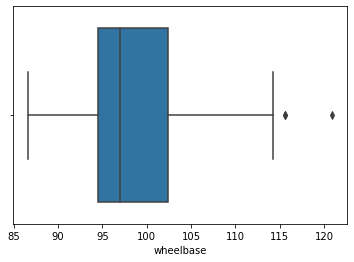

In [19]:
# Kiểm tra ngoại lai của các dữ liệu dạng số: 
# Ví dụ:
sns.boxplot(x=df['wheelbase'])

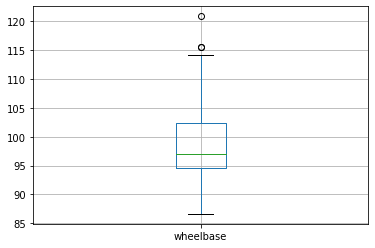

In [20]:
# Kiểm tra ngoại lai của các dữ liệu dạng số: 
# Ví dụ:
boxplot = df.boxplot(column=['wheelbase'])

- Do bộ dữ liệu ở đây đã được công ty tinh chuẩn nên các giá trị của nó hầu như đúng với thực tế vào không có ngoại lai, Trong thực tế có một số hãng xe có mức giá trội hơn rất nhiều so với những hãng xe còn lại bởi thương hiệu của họ. Do đó nếu thấy trong biểu đô có 1 tới 2 điểm ngoại lai thì điều đó hoàn toàn bình thường.

# 4.Phân tích bộ dữ liệu thông qua các biểu đồ

In [22]:
# Tìm hiểu các dữ liệu có trong từng trường thuộc tính xem nó gồm những dữ liệu gì.
# Sử dụng unique để có cái nhìn tổng quan các giá trị khác biệt trong một thuộc tính
# Ví dụ:
df['citympg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

car_ID : Mã xe
symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
CarName: Tên xe
fueltype: Loại nhiên liệu
aspiration: loại hút (turbo hoặc std)
doornumber: Số lượng cửa
carbody: Loại thân xe (sedan, wagon, hatchback,...)
drivewheel: Loại bánh xe
enginelocation: Vị trí động cơ
wheelbase: Chiều dài cơ sở
carlength: Chiều dài xe
carwidth: Chiều rộng xe
carheight: Chiều cao xe
curbweight: Trọng lượng của xe khi không có người hoặc hành lý
enginetype: Loại động cơ
cylindernumber: Số lượng xi lanh đặt trong xe
enginesize: Kích thước động cơ
fuelsystem: Hệ thống nhiên liệu của xe ô tô
boreratio: Tỉ số hành trình
stroke: số kỳ hoăc kích thước bên trong động cơ
compressionratio: Tỉ số nén của ôtô
horsepower: Mã lực
peakrpm: Tốc độ động cơ cao nhất
citympg: số dặm đi được cho 1 galon (~4.5 lít) nhiên liệu trong thành phố
highwaympg: số dặm đi được cho 1 galon (~4.5 lít) nhiên liệu trên đường cao tốc
price: Giá xe

# 4.1.Mối liên hệ giữa tên xe và hãng xe 

In [23]:
# Tìm hiểu dữ liệu có trong trường thuộc tính 'CarName'
df['CarName'].unique()
# Ta thấy hàng xe chính là từ đầu tiên của tên xe

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [24]:
# Tạo một cột có tên 'CarBrand' để hiển thị hãng xe 
CarName_new = df["CarName"].str.split(" ", n = 1, expand = True)
df["CarBrand"]= CarName_new[0]
df.head()
# Dữ liệu df mới sẽ gồm 205 dòng và 27 thuộc tính

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [26]:
# Tìm hiểu dữ liệu có trong trường thuộc tính 'CarBrand' vừa mới tạo
df['CarBrand'].unique()
# Ta nhận thấy có các dữ liệu sai ở trong trường CarBrand

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# Xử lý dữ liệu sai
- alfa-romero thành alfa-romeo
- maxda thành mazda
- nissan thành Nissan
- porcshce thành porsche
- toyouta thành toyota
- vokswagen thành volkswagen
- vw thành volkswagen

In [28]:
# Dùng hàm replace thay thế dữ liệu sai này
df['CarBrand'].replace(['alfa-romero', 'maxda', 'nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw' ],
                  ['alfa-romeo', 'mazda', 'Nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen' ],inplace = True)
df['CarBrand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# 4.2.Xem xét kiểu dữ liệu của các thuộc tính, chuyển đổi chúng về đúng kiểu dữ liệu 

In [29]:
# Kiểu dữ liệu của bảng df mới sau khi thêm cột CarBrand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
# Hiển thị 27 tên cột
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarBrand'],
      dtype='object')

In [32]:
# Thay thế giá trị chữ ở trường doornumber và cylindernumber để tiện chuyển đổi kiểu dữ liệu
df['doornumber'].replace(['two', 'four'], ['2', '4'],inplace = True)
df['doornumber'].unique()

array(['2', '4'], dtype=object)

In [33]:
# Thay thế giá trị chữ ở trường doornumber và cylindernumber để tiện chuyển đổi kiểu dữ liệu
df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], 
                             ['4', '6', '5', '3', '12', '2', '8'],inplace = True)
df['cylindernumber'].unique()

array(['4', '6', '5', '3', '12', '2', '8'], dtype=object)

##- Xem xét ở kiểu dữ liệu của các thuộc tính ta thấy nên chuyển kiểu dữ liệu của các trường sau:
+ doornumber: object thành float64
+ curbweight: int64 thành float64
+ cylindernumber: object thành float64 (Số lượng xi lanh đặt trong xe)
+ enginesize: int64 thành float64
+ horsepower: int64 thành float64
+ peakrpm: int64 thành float64
+ citympg: int64 thành float64
+ highwaympg: int64 thành float64

In [34]:
# Chuyển đổi kiểu dữ liệu của các thuộc tính như đã nêu trên
df1 = df.astype({'doornumber':float, 'curbweight':float
                , 'cylindernumber':float, 'enginesize':float, 'horsepower':float, 'peakrpm':float
                , 'citympg':float, 'highwaympg':float})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

# 4.3.Mối liên hệ của các thuộc tính, biểu diễn tần số, tần suất qua biểu đồ, heat map

# 4.3.1.Biểu đồ pairplot

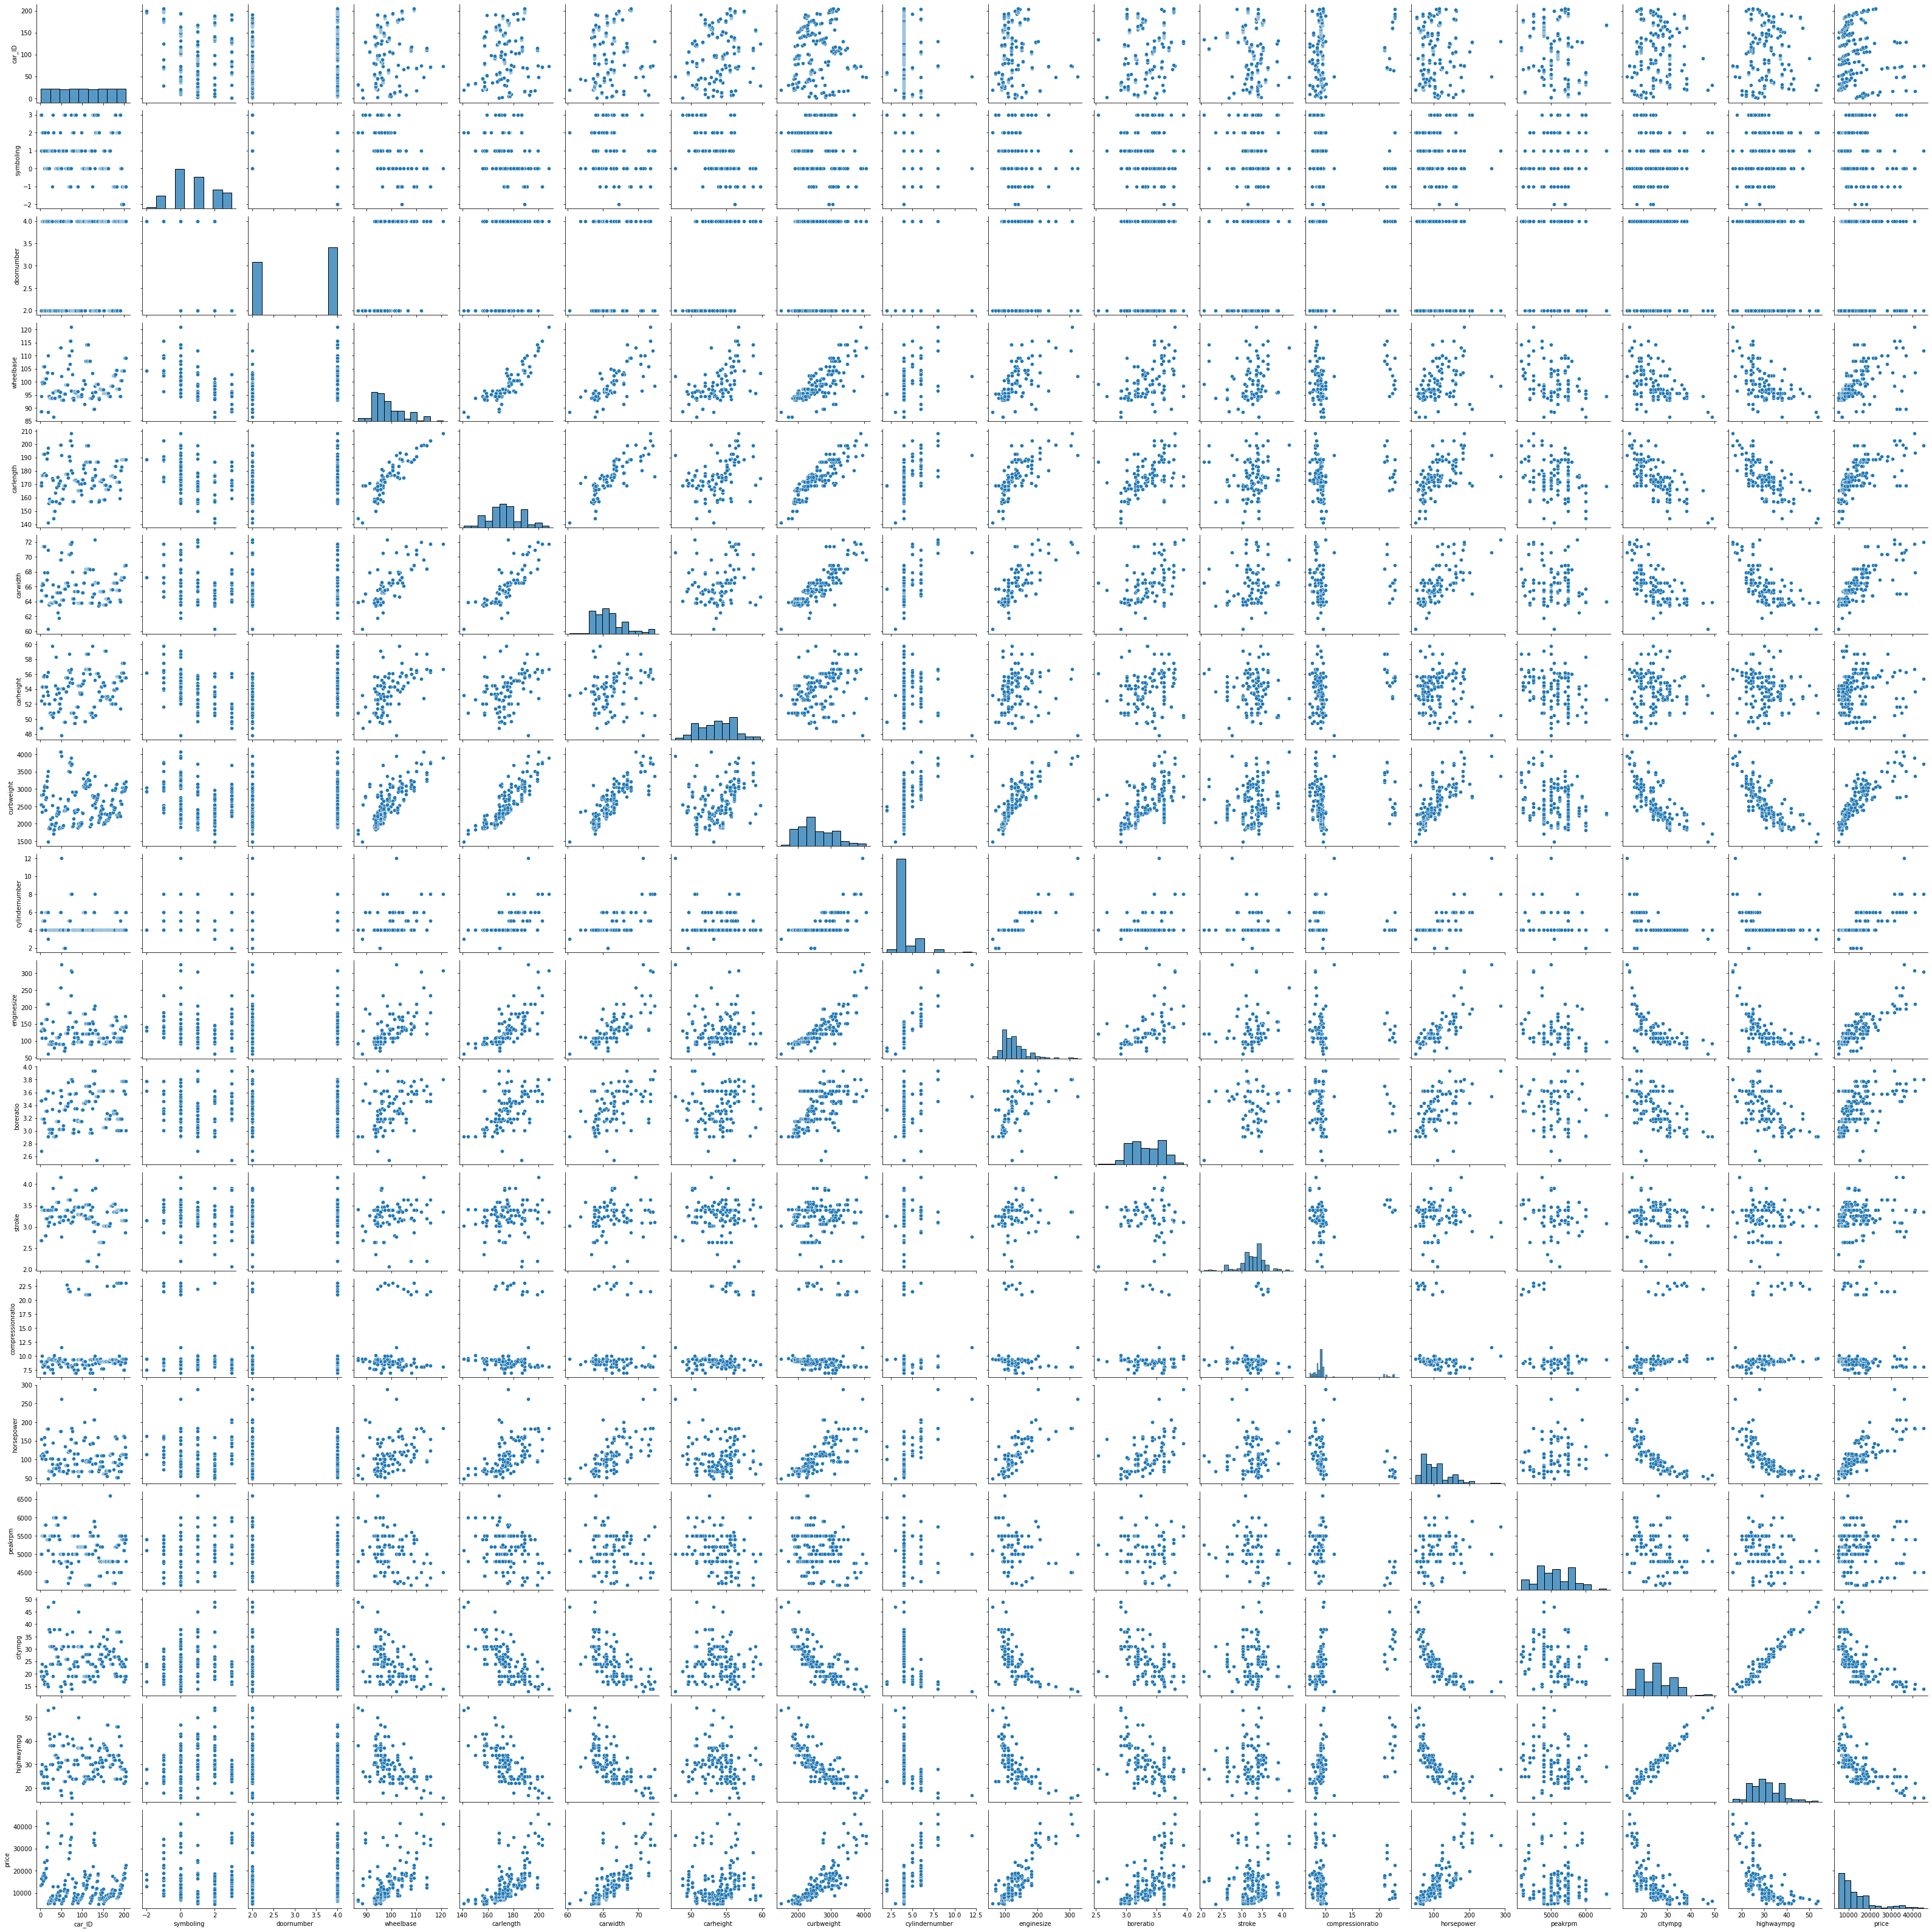

In [35]:
sns.pairplot(df1)

** NHÌN VÀO BIỂU ĐỒ PHÂN TÍCH MỐI LIÊN HỆ CỦA TỪNG THUỘC TÍNH VỚI price dựa vào biểu đồ pairplot:

- Chọn - wheelbase: mối quan hệ tuyến tính
- Chọn - carlength: mối quan hệ tuyến tính
- Chọn - carwidth: mối quan hệ tuyến tính
- Không chọn - carheight: mối quan hệ tuyến tính nhưng chưa rõ ràng
- Chọn - curbweight: mối quan hệ tuyến tính
- Chọn - enginesize: mối quan hệ tuyến tính
- Chọn - boreratio: mối quan hệ tuyến tính nhưng chưa rõ ràng
- Chọn - horsepower: mối quan hệ tuyến tính
- Xem xét - citympg: mối quan hệ nghịch đảo
- Xem xét - highwaympg: mối quan hệ nghịch đảo

# 4.3.2.Biểu đồ tần số xuất hiện countplot

In [51]:
# Hiển thị dữ liệu có kiểu object
df1.select_dtypes(include=['object']).head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romeo
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


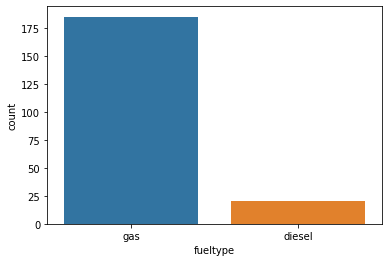

In [42]:
# Hiển thị tần số của mỗi fueltype trong bộ dữ liệu
bar_plot = sns.countplot(x='fueltype',data = df1)
plt.show()

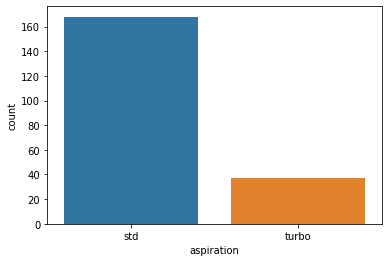

In [43]:
# Hiển thị tần số của mỗi aspiration trong bộ dữ liệu
bar_plot = sns.countplot(x='aspiration',data = df1)
plt.show()

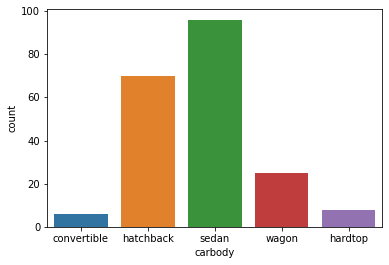

In [44]:
# Hiển thị tần số của mỗi carbody trong bộ dữ liệu
bar_plot = sns.countplot(x='carbody',data = df1)
plt.show()

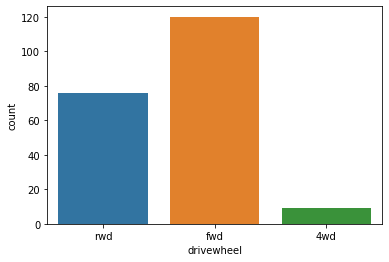

In [45]:
# Hiển thị tần số của mỗi drivewheel trong bộ dữ liệu
bar_plot = sns.countplot(x='drivewheel',data = df1)
plt.show()

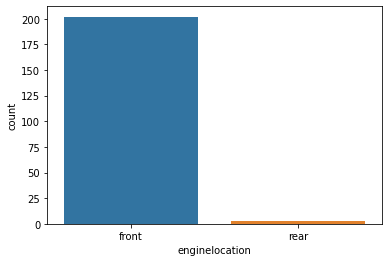

In [46]:
# Hiển thị tần số của mỗi enginelocation trong bộ dữ liệu
bar_plot = sns.countplot(x='enginelocation',data = df1)
plt.show()

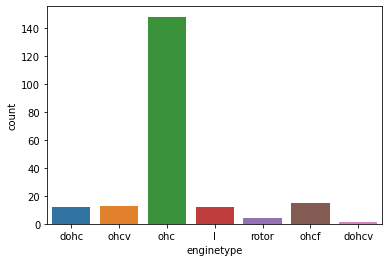

In [47]:
# Hiển thị tần số của mỗi enginetype trong bộ dữ liệu
bar_plot = sns.countplot(x='enginetype',data = df1)
plt.show()

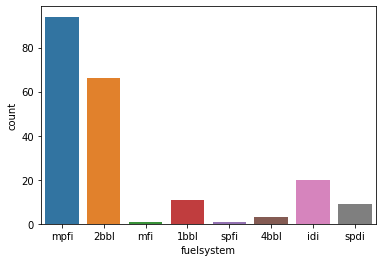

In [48]:
# Hiển thị tần số của mỗi fuelsystem trong bộ dữ liệu
bar_plot = sns.countplot(x='fuelsystem',data = df1)
plt.show()

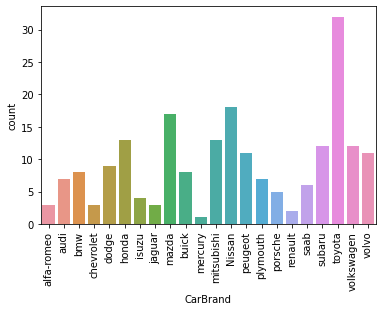

In [36]:
# Hiển thị tần số của mỗi hãng xe trong bộ dữ liệu
bar_plot = sns.countplot(x='CarBrand',data = df1)
plt.xticks(rotation=90)
plt.show()

# 4.3.3.Biểu đồ tần suất xuất hiện hist

In [50]:
# Hiển thị dữ liệu có kiểu object
df1.select_dtypes(include=['object']).head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romeo
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


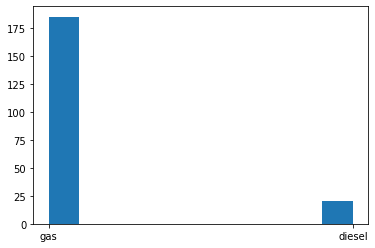

In [52]:
# Tần suất xuất hiện của fueltype
plt.hist(df['fueltype'])
plt.show()

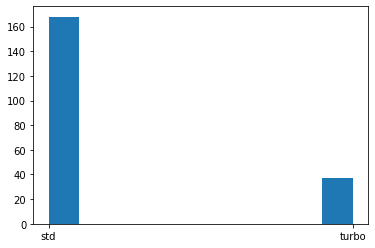

In [53]:
# Tần suất xuất hiện của aspiration
plt.hist(df['aspiration'])
plt.show()

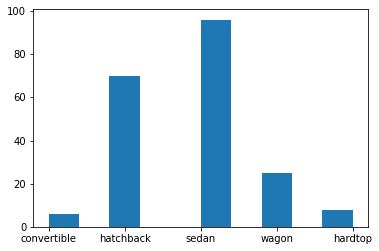

In [54]:
# Tần suất xuất hiện của carbody
plt.hist(df['carbody'])
plt.show()

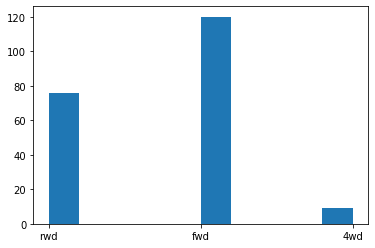

In [55]:
# Tần suất xuất hiện của drivewheel
plt.hist(df['drivewheel'])
plt.show()

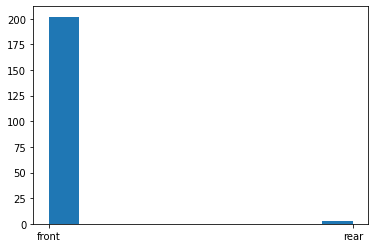

In [56]:
# Tần suất xuất hiện của enginelocation
plt.hist(df['enginelocation'])
plt.show()

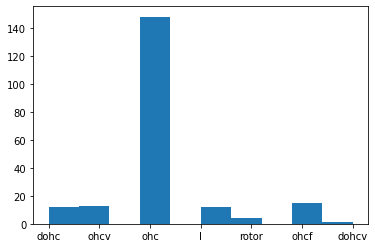

In [57]:
# Tần suất xuất hiện của enginetype
plt.hist(df['enginetype'])
plt.show()

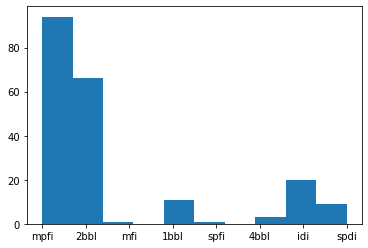

In [58]:
# Tần suất xuất hiện của fuelsystem
plt.hist(df['fuelsystem'])
plt.show()

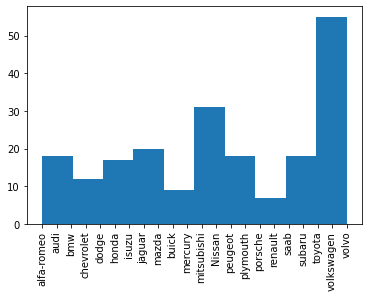

In [59]:
# Tần suất xuất hiện của các hãng xe (CarBrand)
plt.hist(df['CarBrand'])
plt.xticks(rotation=90)
plt.show()

# 4.3.4.Vẽ biểu đồ kết hợp của 8 thuộc tính object 

In [60]:
df_fueltype = df1.groupby(['fueltype'])['price'].count()
df_aspiration = df1.groupby(['aspiration'])['price'].count()
df_carbody = df1.groupby(['carbody'])['price'].count()
df_drivewheel = df1.groupby(['drivewheel'])['price'].count()
df_enginelocation = df1.groupby(['enginelocation'])['price'].count()
df_enginetype = df1.groupby(['enginetype'])['price'].count()
df_fuelsystem = df1.groupby(['fuelsystem'])['price'].count()
df_CarBrand = df1.groupby(['CarBrand'])['price'].count()

C:\Users\admin\AppData\Local\Temp\ipykernel_13544\713911743.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3,1].set_xticklabels(ax[3, 1].get_xticklabels(),rotation=90)


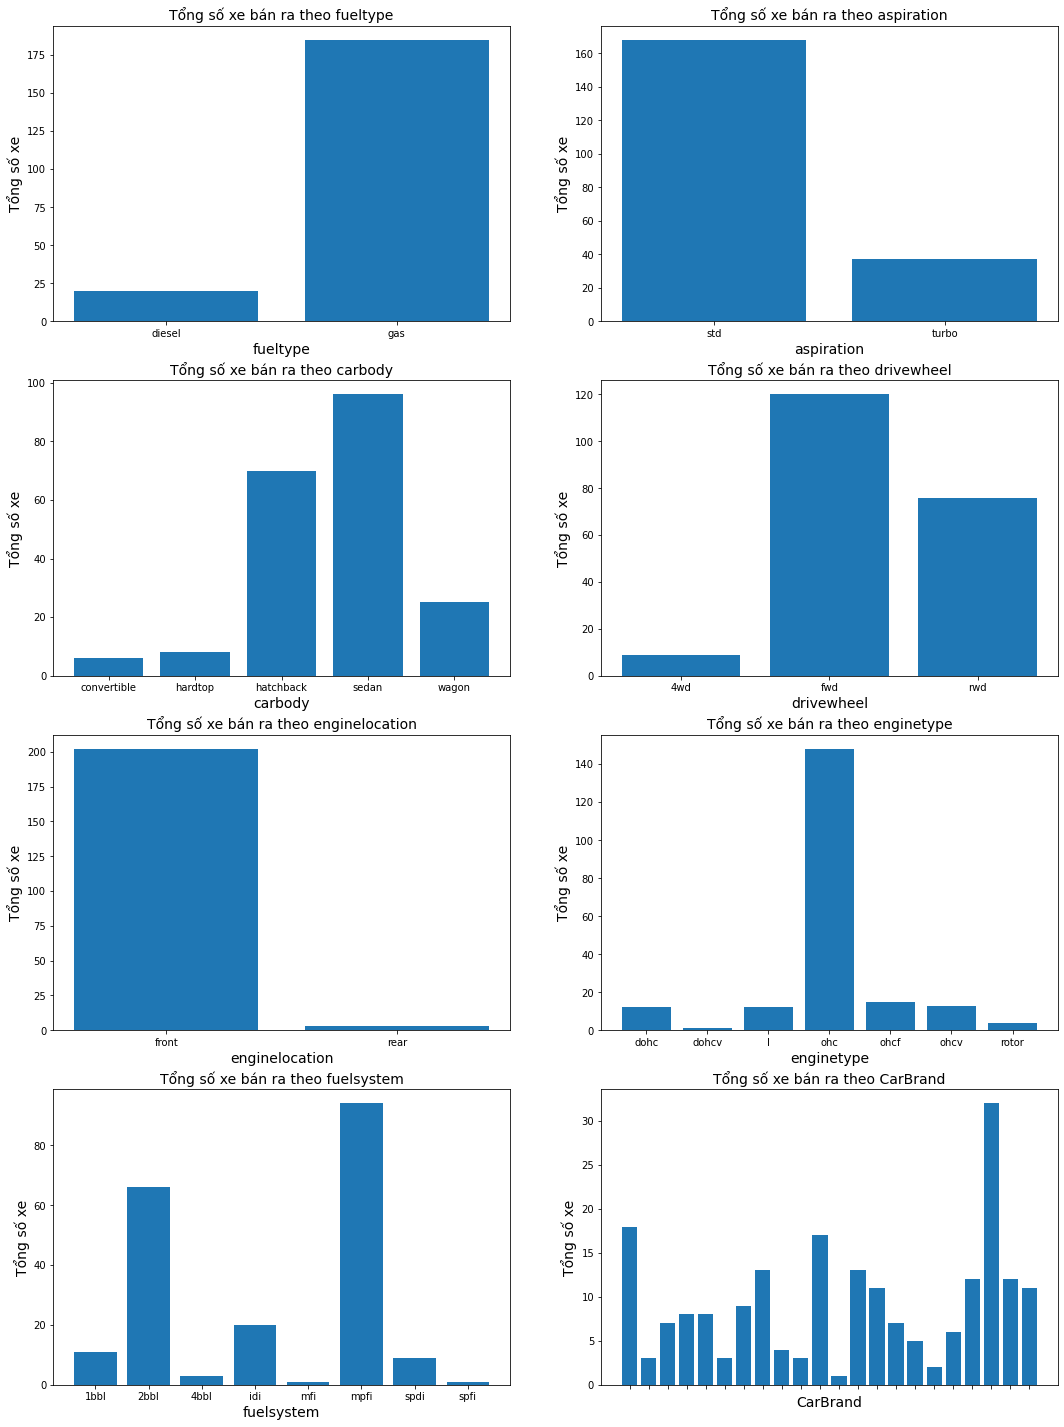

In [61]:
fig,ax=plt.subplots(4,2)

#df_fueltype
ax[0,0].bar(df_fueltype.index,df_fueltype.values)
ax[0,0].set_title('Tổng số xe bán ra theo fueltype',fontsize = 14)
ax[0,0].set_xlabel('fueltype',fontsize=14)
ax[0,0].set_ylabel('Tổng số xe',fontsize=14)

#df_aspiration
ax[0,1].bar(df_aspiration.index,df_aspiration.values)
ax[0,1].set_title('Tổng số xe bán ra theo aspiration',fontsize = 14)
ax[0,1].set_xlabel('aspiration',fontsize=14)
ax[0,1].set_ylabel('Tổng số xe',fontsize=14)

#df_carbody
ax[1,0].bar(df_carbody.index,df_carbody.values)
ax[1,0].set_title('Tổng số xe bán ra theo carbody',fontsize = 14)
ax[1,0].set_xlabel('carbody',fontsize=14)
ax[1,0].set_ylabel('Tổng số xe',fontsize=14)

#df_drivewheel
ax[1,1].bar(df_drivewheel.index,df_drivewheel.values)
ax[1,1].set_title('Tổng số xe bán ra theo drivewheel',fontsize = 14)
ax[1,1].set_xlabel('drivewheel',fontsize=14)
ax[1,1].set_ylabel('Tổng số xe',fontsize=14)

#df_enginelocation
ax[2,0].bar(df_enginelocation.index,df_enginelocation.values)
ax[2,0].set_title('Tổng số xe bán ra theo enginelocation',fontsize = 14)
ax[2,0].set_xlabel('enginelocation',fontsize=14)
ax[2,0].set_ylabel('Tổng số xe',fontsize=14)

#df_enginetype
ax[2,1].bar(df_enginetype.index,df_enginetype.values)
ax[2,1].set_title('Tổng số xe bán ra theo enginetype',fontsize = 14)
ax[2,1].set_xlabel('enginetype',fontsize=14)
ax[2,1].set_ylabel('Tổng số xe',fontsize=14)

#df_fuelsystem
ax[3,0].bar(df_fuelsystem.index,df_fuelsystem.values)
ax[3,0].set_title('Tổng số xe bán ra theo fuelsystem',fontsize = 14)
ax[3,0].set_xlabel('fuelsystem',fontsize=14)
ax[3,0].set_ylabel('Tổng số xe',fontsize=14)

#df_CarBrand
ax[3,1].bar(df_CarBrand.index,df_CarBrand.values)
ax[3,1].set_title('Tổng số xe bán ra theo CarBrand',fontsize = 14)
ax[3,1].set_xlabel('CarBrand',fontsize=14)
ax[3,1].set_ylabel('Tổng số xe',fontsize=14)
ax[3,1].set_xticklabels(ax[3, 1].get_xticklabels(),rotation=90)

    
fig.set_size_inches(18,25)


plt.show()

# 4.3.5.Heat map

In [64]:
# Hiển thị dữ liệu có kiểu object
df1.select_dtypes(include=['float','int']).head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [65]:
df1.select_dtypes(include=['float','int']).shape

(205, 18)

In [67]:
# Dùng corr để tính liên quan giữa các cột có kiểu dữ liệu int và float với thuộc tính giá xe price
df1.corr().price

car_ID             -0.109093
symboling          -0.079978
doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [94]:
# Phân tích tương quan các thuộc tính định lượng với Price để chọn thuộc tính vẽ biểu đồ heatmap
dinh_luong = ['car_ID','symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight',
              'cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm',
              'citympg','highwaympg']
for i in dinh_luong:
    r, pvalue = stats.pearsonr(df1[i],df1['price'])
    if pvalue < 0.05:
        print (f'Thuộc tính {i} và price có tương quan với giá trị r = {r}, giá trị pvalue = {pvalue}')
    

Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779622, giá trị pvalue = 1.6787066240746602e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002833, giá trị pvalue = 8.028863372444832e-34
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245117, giá trị pvalue = 1.3547637598648421e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
Thuộc tính citympg và price có tương qu

In [78]:
# Chọn một vài thuộc tính để vẽ biểu đồ heatmap, tạo tập dữ liệu heatmap
df_heatmap = df1[['wheelbase', 'carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower'
                 ,'citympg','highwaympg','price']]
df_heatmap.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,2823.0,6.0,152.0,2.68,154.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,2337.0,4.0,109.0,3.19,102.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,2824.0,5.0,136.0,3.19,115.0,18.0,22.0,17450.0


In [79]:
# xem thông tin của tập dữ liệu heatmap
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wheelbase       205 non-null    float64
 1   carlength       205 non-null    float64
 2   carwidth        205 non-null    float64
 3   curbweight      205 non-null    float64
 4   cylindernumber  205 non-null    float64
 5   enginesize      205 non-null    float64
 6   boreratio       205 non-null    float64
 7   horsepower      205 non-null    float64
 8   citympg         205 non-null    float64
 9   highwaympg      205 non-null    float64
 10  price           205 non-null    float64
dtypes: float64(11)
memory usage: 17.7 KB


In [70]:
# Chuẩn hóa các thuộc tính của df_heatmap
from sklearn.preprocessing import StandardScaler
# StandardScaler chính là Z-score Scaler
s_scaler = StandardScaler()
df_heatmap_ch = s_scaler.fit_transform(df_heatmap)
# trả về array 2 chiều, mảng 2 chiều
print(df_heatmap_ch)
df_heatmap_ch = pd.DataFrame(df_heatmap_ch,columns=['wheelbase', 'carlength','carwidth','curbweight',
                                                    'cylindernumber','enginesize','boreratio','horsepower'
                                                    ,'citympg','highwaympg','price'])
print(df_heatmap_ch)
# => Cách 2 dùng cho mô hình học máy

[[-1.6907718  -0.42652147 -0.84478235 ... -0.64655303 -0.54605874
   0.02739114]
 [-1.6907718  -0.42652147 -0.84478235 ... -0.64655303 -0.54605874
   0.4044611 ]
 [-0.70859588 -0.23151305 -0.19056612 ... -0.95301169 -0.69162706
   0.4044611 ]
 ...
 [ 1.72187336  1.19854871  1.39824472 ... -1.10624102 -1.12833203
   1.02998314]
 [ 1.72187336  1.19854871  1.39824472 ...  0.11959362 -0.54605874
   1.15358178]
 [ 1.72187336  1.19854871  1.39824472 ... -0.95301169 -0.83719538
   1.17303131]]
     wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
0    -1.690772  -0.426521 -0.844782   -0.014566       -0.352887    0.074449   
1    -1.690772  -0.426521 -0.844782   -0.014566       -0.352887    0.074449   
2    -0.708596  -0.231513 -0.190566    0.514882        1.502032    0.604046   
3     0.173698   0.207256  0.136542   -0.420797       -0.352887   -0.431076   
4     0.107110   0.207256  0.230001    0.516807        0.574572    0.218885   
..         ...        ...       ..

In [80]:
# tạo tệp dữ liệu corr để vẽ biểu đồ heatmap
corr = df_heatmap_ch.corr()
corr

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.339507,0.569329,0.488750,0.353294,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.430672,0.683360,0.606454,0.552623,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.545007,0.735433,0.559150,0.640732,-0.642704,-0.677218,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.609727,0.850594,0.648480,0.750739,-0.757414,-0.797465,0.835305
cylindernumber,0.339507,0.430672,0.545007,0.609727,1.000000,0.846031,0.231399,0.692016,-0.445837,-0.466666,0.718305
enginesize,0.569329,0.683360,0.735433,0.850594,0.846031,1.000000,0.583774,0.809769,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.231399,0.583774,1.000000,0.573677,-0.584532,-0.587012,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.692016,0.809769,0.573677,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.445837,-0.653658,-0.584532,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.466666,-0.677470,-0.587012,-0.770544,0.971337,1.000000,-0.697599


<AxesSubplot:>

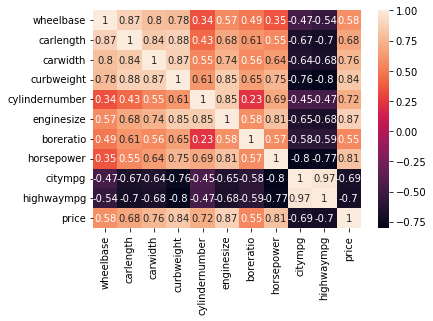

In [81]:
# vẽ biểu đồ heatmap bằng seaborn để hiển thị rõ hơn dữ liệu
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<AxesSubplot:>

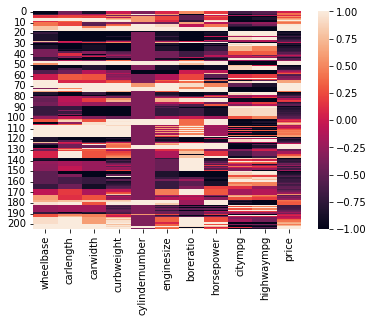

In [82]:
# Vẽ hiểu đồ heatmap truyền thống, rất khó để cho nhận xét về tính tương quan của các dữ liệu
sns.heatmap(df_heatmap_ch,vmin=-1,vmax=1)

- Xác định các trục: Trục ngang và trục dọc của biểu đồ heatmap thường tương ứng với các cột và hàng trong tập dữ liệu của bạn.

- Xác định màu sắc: Màu sắc trên biểu đồ heatmap thường tương ứng với mức độ liên quan giữa các giá trị trong tập dữ liệu. Thông thường, màu sắc từ xanh lá cây đến đỏ cho biết mức độ liên quan giữa các giá trị từ thấp đến cao.

- Xác định giá trị: Giá trị của mỗi ô trên biểu đồ heatmap có thể được hiển thị dưới dạng một số hoặc dấu nối.

- Xác định mức độ liên quan: Bằng cách xem màu sắc của mỗi ô trên biểu đồ, bạn có thể xác định mức độ liên quan giữa các giá trị tương ứng trên trục ngang và trục dọc. 

#  5.Mã hóa dữ liệu (không mã hóa thành các biến dummy mà sử dụng label encoding), chuẩn hóa dữ liệu, phân tích tương quan, chạy pt hồi quy

# 5.1. Mã hóa dữ liệu (không mã hóa thành các biến dummy mà sử dụng label encoding), có chuẩn hóa dữ liệu, phân tích tương quan, chạy pt hồi quy 

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [87]:
# Mã hóa label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
# Tạo bảng dữ liệu chứa các thuộc tính object của df1
df_object_labelencoding = df1.iloc[:,1:].select_dtypes(['object'])
df_object_labelencoding.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romeo
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [90]:
# Mã hóa tất cả các cột
Ma_hoa = ['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'
             ,'CarBrand']
for i in Ma_hoa:
    df_object_labelencoding[f'encoder_{i}'] = le.fit_transform(df_object_labelencoding[i])
df_object_labelencoding.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo,2,1,0,0,2,0,0,5,1
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romeo,3,1,0,0,2,0,0,5,1
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romeo,1,1,0,2,2,0,5,5,1
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi,4,1,0,3,1,0,3,5,2
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi,5,1,0,3,0,0,3,5,2


In [93]:
# Tạo bảng dữ liệu mới từ bảng df_object_labelencoding thành bảng chỉ bao gồm các dữ liệu được mã hóa
df_object_labelencoding_1 = df_object_labelencoding.iloc[:,9:]
df_object_labelencoding_1.head()

,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,2,1,0,0,2,0,0,5,1
1,3,1,0,0,2,0,0,5,1
2,1,1,0,2,2,0,5,5,1
3,4,1,0,3,1,0,3,5,2
4,5,1,0,3,0,0,3,5,2


In [102]:
df_object_labelencoding_1.shape

(205, 9)

#-Căn cứ vào phần tích tương quan các thuộc tính để đưa vào bảng heatmap ta có kết quả sau:
- Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
- Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779622, giá trị pvalue = 1.6787066240746602e-29
- Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
- Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
- Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002833, giá trị pvalue = 8.028863372444832e-34
- Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245117, giá trị pvalue = 1.3547637598648421e-65
- Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
- Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
- Thuộc tính citympg và price có tương quan với giá trị r = -0.6857513360270397, giá trị pvalue = 7.978684249663976e-30
- Thuộc tính highwaympg và price có tương quan với giá trị r = -0.6975990916465565, giá trị pvalue = 3.230681380364601e-31

In [95]:
# Sử dụng PP feature selection để lựa chọn ra các biến tốt nhất căn cứ vào phân tích tương quan giữa các thuộc tính định tính trong tập dữ liệu với price
df_feature_selection = df1[['wheelbase', 'carlength','carwidth','curbweight','cylindernumber','enginesize',
                            'boreratio','horsepower','citympg','highwaympg','price']]
df_feature_selection.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,2823.0,6.0,152.0,2.68,154.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,2337.0,4.0,109.0,3.19,102.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,2824.0,5.0,136.0,3.19,115.0,18.0,22.0,17450.0


In [97]:
df_feature_selection.shape

(205, 11)

In [99]:
# nối bản dữ liệu df_object_labelencoding_1 với bản df_feature_selection
merged_df1 = df_feature_selection.merge(df_object_labelencoding_1, left_index=True, right_index=True)
merged_df1.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,13495.0,2,1,0,0,2,0,0,5,1
1,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,27.0,16500.0,3,1,0,0,2,0,0,5,1
2,94.5,171.2,65.5,2823.0,6.0,152.0,2.68,154.0,19.0,26.0,16500.0,1,1,0,2,2,0,5,5,1
3,99.8,176.6,66.2,2337.0,4.0,109.0,3.19,102.0,24.0,30.0,13950.0,4,1,0,3,1,0,3,5,2
4,99.4,176.6,66.4,2824.0,5.0,136.0,3.19,115.0,18.0,22.0,17450.0,5,1,0,3,0,0,3,5,2


In [106]:
merged_df1.shape

(205, 20)

In [166]:
# Chuẩn hóa dữ liệu merged_df1 bằng standard scaler
# Chuẩn hóa các thuộc tính của df_heatmap
from sklearn.preprocessing import StandardScaler
# StandardScaler chính là Z-score Scaler
s_scaler = StandardScaler()
merged_df1_ch = s_scaler.fit_transform(merged_df1)
# trả về array 2 chiều, mảng 2 chiều
print(merged_df1_ch)
merged_df1_ch = pd.DataFrame(merged_df1_ch,columns=merged_df1.columns.tolist())
print(merged_df1_ch)

[[-1.6907718  -0.42652147 -0.84478235 ... -2.86510549  0.8695675
  -1.54133064]
 [-1.6907718  -0.42652147 -0.84478235 ... -2.86510549  0.8695675
  -1.54133064]
 [-0.70859588 -0.23151305 -0.19056612 ...  1.88688986  0.8695675
  -1.54133064]
 ...
 [ 1.72187336  1.19854871  1.39824472 ...  1.88688986  0.8695675
   1.37220354]
 [ 1.72187336  1.19854871  1.39824472 ... -0.01390828 -0.12630589
   1.37220354]
 [ 1.72187336  1.19854871  1.39824472 ... -0.01390828  0.8695675
   1.37220354]]
     wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
0    -1.690772  -0.426521 -0.844782   -0.014566       -0.352887    0.074449   
1    -1.690772  -0.426521 -0.844782   -0.014566       -0.352887    0.074449   
2    -0.708596  -0.231513 -0.190566    0.514882        1.502032    0.604046   
3     0.173698   0.207256  0.136542   -0.420797       -0.352887   -0.431076   
4     0.107110   0.207256  0.230001    0.516807        0.574572    0.218885   
..         ...        ...       ...    

In [167]:
# Phân tích tương quan các thuộc tính merged_df1_ch(định tính) với Price
col_names1 = merged_df1_ch.columns.tolist()
for i in col_names1:
    r, pvalue = stats.pearsonr(merged_df1_ch[i],merged_df1_ch['price'])
    if pvalue < 0.05:
        print (f'Thuộc tính {i} và price có tương quan với giá trị r = {r}, giá trị pvalue = {pvalue}')
    

Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779623, giá trị pvalue = 1.6787066240746123e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002832, giá trị pvalue = 8.02886337244506e-34
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245118, giá trị pvalue = 1.3547637598647268e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
Thuộc tính citympg và price có tương qua

In [129]:
# reshape X về 15 cột, n dòng (bỏ đi cột encoder_CarName vì ta đã tổng hợp về cột CarBrand rồi)
# reshape y về 1 cột, n dòng
X_merged_df1_ch = merged_df1_ch.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand']].values.reshape(-1,15)
y_merged_df1_ch = merged_df1_ch.loc[:, "price"]
X_merged_df1_ch

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.12186667,
         0.8695675 , -1.54133064],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.12186667,
         0.8695675 , -1.54133064],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.12186667,
         0.8695675 , -1.54133064],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.12186667,
         0.8695675 ,  1.37220354],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.12186667,
        -0.12630589,  1.37220354],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.12186667,
         0.8695675 ,  1.37220354]])

In [130]:
m_merged_df1_ch = LinearRegression()
m_merged_df1_ch.fit(X_merged_df1_ch,y_merged_df1_ch.ravel())

LinearRegression()

In [168]:
print (f'The linear model is: \n Y = {m_merged_df1_ch.intercept_} +\
{m_merged_df1_ch.coef_[0]}*X1 + {m_merged_df1_ch.coef_[1]}*X2 + \
{m_merged_df1_ch.coef_[2]}*X3 + {m_merged_df1_ch.coef_[3]}*X4 + \
{m_merged_df1_ch.coef_[4]}*X5 + {m_merged_df1_ch.coef_[5]}*X6 + \
{m_merged_df1_ch.coef_[6]}*X7 + {m_merged_df1_ch.coef_[7]}*X8 + \
{m_merged_df1_ch.coef_[8]}*X9 + {m_merged_df1_ch.coef_[9]}*X10 + \
{m_merged_df1_ch.coef_[10]}*X11 + {m_merged_df1_ch.coef_[11]}*X12 + \
{m_merged_df1_ch.coef_[12]}*X13 + {m_merged_df1_ch.coef_[13]}*X14 + \
{m_merged_df1_ch.coef_[14]}*X15')

The linear model is: 
 Y = 4.788826197684368e-16 +0.11119091598801838*X1 + -0.08204996453774471*X2 + 0.21454007048951818*X3 + 0.21642579891529623*X4 + 0.025358627070706522*X5 + 0.2979777948409458*X6 + -0.042850807305028*X7 + 0.15118605339077534*X8 + -0.015254402632818747*X9 + 0.0030176117140662713*X10 + -0.012231416717885347*X11 + 0.08151956715722258*X12 + 0.23006101607560725*X13 + -0.00394410082624572*X14 + -0.09894154805243892*X15


In [169]:
# Đánh giá chất lượng mô hình
X_merged_df1_ch = merged_df1_ch.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand']].values.reshape(-1,15)
y_merged_df1_ch = merged_df1_ch.loc[:, "price"]
exog_merged_df1_ch = sm.add_constant( X_merged_df1_ch )
estimator_merged_df1_ch = sm.OLS( y_merged_df1_ch , exog_merged_df1_ch ).fit()
print(estimator_merged_df1_ch.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     86.02
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           7.09e-76
Time:                        15:19:10   Log-Likelihood:                -79.979
No. Observations:                 205   AIC:                             192.0
Df Residuals:                     189   BIC:                             245.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.026   6.41e-15      1.0

In [144]:
# CHẠY KIỂM THỬ MÔ HÌNH
# Tạo các list hiển thị các giá trị bị mã hóa
#
list_aspiration = df_object_labelencoding['aspiration'].unique()
list_aspiration = sorted(list_aspiration)
label = [ i for i in range(len(list_aspiration))]
list_aspiration_dict = {list_aspiration[i]: i for i in range(len(list_aspiration))}
#
list_drivewheel = df_object_labelencoding['drivewheel'].unique()
list_drivewheel = sorted(list_drivewheel)
label = [ i for i in range(len(list_drivewheel))]
list_drivewheel_dict = {list_drivewheel[i]: i for i in range(len(list_drivewheel))}
#
list_enginelocation = df_object_labelencoding['enginelocation'].unique()
list_enginelocation = sorted(list_enginelocation)
label = [ i for i in range(len(list_enginelocation))]
list_enginelocation_dict = {list_enginelocation[i]: i for i in range(len(list_enginelocation))}
#
list_fuelsystem = df_object_labelencoding['fuelsystem'].unique()
list_fuelsystem = sorted(list_fuelsystem)
label = [ i for i in range(len(list_fuelsystem))]
list_fuelsystem_dict = {list_fuelsystem[i]: i for i in range(len(list_fuelsystem))}
#
list_CarBrand = df_object_labelencoding['CarBrand'].unique()
list_CarBrand = sorted(list_CarBrand)
label = [ i for i in range(len(list_CarBrand))]
list_CarBrand_dict = {list_CarBrand[i]: i for i in range(len(list_CarBrand))}

print(list_aspiration_dict,
     list_drivewheel_dict, 
     list_enginelocation_dict,
     list_fuelsystem_dict,
     list_CarBrand_dict)

{'std': 0, 'turbo': 1} {'4wd': 0, 'fwd': 1, 'rwd': 2} {'front': 0, 'rear': 1} {'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7} {'Nissan': 0, 'alfa-romeo': 1, 'audi': 2, 'bmw': 3, 'buick': 4, 'chevrolet': 5, 'dodge': 6, 'honda': 7, 'isuzu': 8, 'jaguar': 9, 'mazda': 10, 'mercury': 11, 'mitsubishi': 12, 'peugeot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}


In [290]:
# Nhập liệu vào mô hình
wheelbase = float(input('Nhập Chiều dài cơ sở wheelbase: '))
carlength = float(input('Nhập Chiều dài xe carlength: '))
carwidth = float(input('Nhập Chiều rộng xe carwidth: '))
curbweight = float(input('Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: '))
cylindernumber = float(input('Nhập Số lượng xi lanh đặt trong xe cylindernumber: '))
enginesize = float(input('Nhập Kích thước động cơ enginesize: '))
boreratio = float(input('Nhập Tỉ số hành trình boreratio: '))
horsepower = float(input('Nhập Mã lực horsepower: '))
citympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: '))
highwaympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: '))
#
print('**********')
print('Các loại aspiration:')
print(list_aspiration_dict)
encoder_aspiration = float(input('Nhập loại hút (turbo hoặc std): '))
#
print('**********')
print('Các loại drivewheel:')
print(list_drivewheel_dict)
encoder_drivewheel = float(input('Nhập Loại bánh xe: '))
#
print('**********')
print('Các loại enginelocation:')
print(list_enginelocation_dict)
encoder_enginelocation = float(input('Nhập Vị trí động cơ: '))
#
print('**********')
print('Các loại fuelsystem:')
print(list_fuelsystem_dict)
encoder_fuelsystem = float(input('Nhập Hệ thống nhiên liệu của xe ô tô: '))
#
print('**********')
print('Các loại CarBrand:')
print(list_CarBrand_dict)
encoder_CarBrand = float(input('Nhập hãng xe: '))
#
price = m_merged_df1_ch.intercept_ + (m_merged_df1_ch.coef_[0]*wheelbase + m_merged_df1_ch.coef_[1]*carlength + 
m_merged_df1_ch.coef_[2]*carwidth + m_merged_df1_ch.coef_[3]*curbweight + m_merged_df1_ch.coef_[4]*cylindernumber + 
m_merged_df1_ch.coef_[5]*enginesize + m_merged_df1_ch.coef_[6]*boreratio + m_merged_df1_ch.coef_[7]*horsepower + 
m_merged_df1_ch.coef_[8]*citympg + m_merged_df1_ch.coef_[9]*highwaympg + m_merged_df1_ch.coef_[10]*encoder_aspiration
+ m_merged_df1_ch.coef_[11]*encoder_drivewheel + m_merged_df1_ch.coef_[12]*encoder_enginelocation 
+ m_merged_df1_ch.coef_[13]*encoder_fuelsystem + m_merged_df1_ch.coef_[14]*encoder_CarBrand)
print('Giá xe dự đoán là: ', price)

Nhập Chiều dài cơ sở wheelbase: 88.6
Nhập Chiều dài xe carlength: 168.8
Nhập Chiều rộng xe carwidth: 64.1
Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: 2548
Nhập Số lượng xi lanh đặt trong xe cylindernumber: 4
Nhập Kích thước động cơ enginesize: 130
Nhập Tỉ số hành trình boreratio: 3.47
Nhập Mã lực horsepower: 111
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: 21
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: 27
**********
Các loại aspiration:
{'std': 0, 'turbo': 1}
Nhập loại hút (turbo hoặc std): 0
**********
Các loại drivewheel:
{'4wd': 0, 'fwd': 1, 'rwd': 2}
Nhập Loại bánh xe: 2
**********
Các loại enginelocation:
{'front': 0, 'rear': 1}
Nhập Vị trí động cơ: 0
**********
Các loại fuelsystem:
{'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}
Nhập Hệ thống nhiên liệu của xe ô tô: 5
**********
Các loại CarBrand:
{'Nissan': 0, 'alfa-romeo': 1, 'audi': 2, 'bmw': 3,

In [289]:
# Hiển thị một bản ghi ví dụ:
# Ví dụ bản ghi
row = merged_df1.iloc[1]
row

wheelbase                    88.60
carlength                   168.80
carwidth                     64.10
curbweight                 2548.00
cylindernumber                4.00
enginesize                  130.00
boreratio                     3.47
horsepower                  111.00
citympg                      21.00
highwaympg                   27.00
price                     16500.00
encoder_CarName               3.00
encoder_fueltype              1.00
encoder_aspiration            0.00
encoder_carbody               0.00
encoder_drivewheel            2.00
encoder_enginelocation        0.00
encoder_enginetype            0.00
encoder_fuelsystem            5.00
encoder_CarBrand              1.00
Name: 1, dtype: float64

# Kết luận 

- Mô hình gồm 15 biến: "wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand'
- Có R-squared: 0.872 
- Tuy nhiên còn nhiều dữ liệu với pvalue > alpha nên không chọn mô hình này
- Chạy giá thử thì ra kết quả 616.4834529028747 so với giá của thuộc tính 16500.00 (Không chọn mô hình này)

# # 5.2. Mã hóa dữ liệu (không mã hóa thành các biến dummy mà sử dụng label encoding), không chuẩn hóa dữ liệu, phân tích tương quan, chạy pt hồi quy  

# Không chuẩn hóa dữ liệu 

In [160]:
# reshape X về 15 cột, n dòng (bỏ đi cột CarName vì ta đã tổng hợp về cột CarBrand rồi)
# reshape y về 1 cột, n dòng
X_merged_df1 = merged_df1.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand']].values.reshape(-1,15)
y_merged_df1 = merged_df1.loc[:, "price"]
X_merged_df1

array([[ 88.6, 168.8,  64.1, ...,   0. ,   5. ,   1. ],
       [ 88.6, 168.8,  64.1, ...,   0. ,   5. ,   1. ],
       [ 94.5, 171.2,  65.5, ...,   0. ,   5. ,   1. ],
       ...,
       [109.1, 188.8,  68.9, ...,   0. ,   5. ,  21. ],
       [109.1, 188.8,  68.9, ...,   0. ,   3. ,  21. ],
       [109.1, 188.8,  68.9, ...,   0. ,   5. ,  21. ]])

In [170]:
m_merged_df1 = LinearRegression()
m_merged_df1.fit(X_merged_df1,y_merged_df1.ravel())

LinearRegression()

In [171]:
print (f'The linear model is: \n Y = {m_merged_df1.intercept_} +\
{m_merged_df1.coef_[0]}*X1 + {m_merged_df1.coef_[1]}*X2 + \
{m_merged_df1.coef_[2]}*X3 + {m_merged_df1.coef_[3]}*X4 + \
{m_merged_df1.coef_[4]}*X5 + {m_merged_df1.coef_[5]}*X6 + \
{m_merged_df1.coef_[6]}*X7 + {m_merged_df1.coef_[7]}*X8 + \
{m_merged_df1.coef_[8]}*X9 + {m_merged_df1.coef_[9]}*X10 + \
{m_merged_df1.coef_[10]}*X11 + {m_merged_df1.coef_[11]}*X12 + \
{m_merged_df1.coef_[12]}*X13 + {m_merged_df1.coef_[13]}*X14 + \
{m_merged_df1.coef_[14]}*X15')

The linear model is: 
 Y = -60222.7885798559 +147.512603411723*X1 + -53.13039806971473*X2 + 798.9585419751959*X3 + 3.3206442969917527*X4 + 187.43176345535147*X5 + 57.164904682660506*X6 + -1263.934752764976*X7 + 30.543140812161763*X8 + -18.627718032766946*X9 + 3.5006829969871784*X10 + -253.45313506571932*X11 + 1170.9497802777548*X12 + 15268.034383560544*X13 + -15.651093635361025*X14 + -114.86596611263103*X15


In [172]:
# Đánh giá chất lượng mô hình
X_merged_df1 = merged_df1.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand']].values.reshape(-1,15)
y_merged_df1 = merged_df1.loc[:, "price"]
exog_merged_df1 = sm.add_constant(X_merged_df1)
estimator_merged_df1 = sm.OLS(y_merged_df1,exog_merged_df1).fit()
print(estimator_merged_df1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     86.02
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           7.09e-76
Time:                        15:20:42   Log-Likelihood:                -1921.6
No. Observations:                 205   AIC:                             3875.
Df Residuals:                     189   BIC:                             3928.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.022e+04   1.22e+04     -4.939      0.0

In [165]:
# Nhập liệu vào mô hình
wheelbase = float(input('Nhập Chiều dài cơ sở wheelbase: '))
carlength = float(input('Nhập Chiều dài xe carlength: '))
carwidth = float(input('Nhập Chiều rộng xe carwidth: '))
curbweight = float(input('Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: '))
cylindernumber = float(input('Nhập Số lượng xi lanh đặt trong xe cylindernumber: '))
enginesize = float(input('Nhập Kích thước động cơ enginesize: '))
boreratio = float(input('Nhập Tỉ số hành trình boreratio: '))
horsepower = float(input('Nhập Mã lực horsepower: '))
citympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: '))
highwaympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: '))
#
print('**********')
print('Các loại aspiration:')
print(list_aspiration_dict)
encoder_aspiration = float(input('Nhập loại hút (turbo hoặc std): '))
#
print('**********')
print('Các loại drivewheel:')
print(list_drivewheel_dict)
encoder_drivewheel = float(input('Nhập Loại bánh xe: '))
#
print('**********')
print('Các loại enginelocation:')
print(list_enginelocation_dict)
encoder_enginelocation = float(input('Nhập Vị trí động cơ: '))
#
print('**********')
print('Các loại fuelsystem:')
print(list_fuelsystem_dict)
encoder_fuelsystem = float(input('Nhập Hệ thống nhiên liệu của xe ô tô: '))
#
print('**********')
print('Các loại CarBrand:')
print(list_CarBrand_dict)
encoder_CarBrand = float(input('Nhập hãng xe: '))
#
price = m_merged_df1.intercept_ + (m_merged_df1.coef_[0]*wheelbase + m_merged_df1.coef_[1]*carlength + 
m_merged_df1.coef_[2]*carwidth + m_merged_df1.coef_[3]*curbweight + m_merged_df1.coef_[4]*cylindernumber + 
m_merged_df1.coef_[5]*enginesize + m_merged_df1.coef_[6]*boreratio + m_merged_df1.coef_[7]*horsepower + 
m_merged_df1.coef_[8]*citympg + m_merged_df1.coef_[9]*highwaympg + m_merged_df1.coef_[10]*encoder_aspiration
+ m_merged_df1.coef_[11]*encoder_drivewheel + m_merged_df1.coef_[12]*encoder_enginelocation 
+ m_merged_df1.coef_[13]*encoder_fuelsystem + m_merged_df1.coef_[14]*encoder_CarBrand)
print('Giá xe dự đoán là: ', price)

Nhập Chiều dài cơ sở wheelbase: 88.6
Nhập Chiều dài xe carlength: 168.8
Nhập Chiều rộng xe carwidth: 64.1
Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: 2548
Nhập Số lượng xi lanh đặt trong xe cylindernumber: 4
Nhập Kích thước động cơ enginesize: 130
Nhập Tỉ số hành trình boreratio: 3.47
Nhập Mã lực horsepower: 111
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: 21
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: 27
**********
Các loại aspiration:
{'std': 0, 'turbo': 1}
Nhập loại hút (turbo hoặc std): 0
**********
Các loại drivewheel:
{'4wd': 0, 'fwd': 1, 'rwd': 2}
Nhập Loại bánh xe: 2
**********
Các loại enginelocation:
{'front': 0, 'rear': 1}
Nhập Vị trí động cơ: 0
**********
Các loại fuelsystem:
{'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}
Nhập Hệ thống nhiên liệu của xe ô tô: 5
**********
Các loại CarBrand:
{'Nissan': 0, 'alfa-romeo': 1, 'audi': 2, 'bmw': 3,

In [164]:
# Hiển thị một bản ghi ví dụ:
# Ví dụ bản ghi
row = merged_df1.iloc[1]
row

wheelbase                    88.60
carlength                   168.80
carwidth                     64.10
curbweight                 2548.00
cylindernumber                4.00
enginesize                  130.00
boreratio                     3.47
horsepower                  111.00
citympg                      21.00
highwaympg                   27.00
price                     16500.00
encoder_CarName               3.00
encoder_fueltype              1.00
encoder_aspiration            0.00
encoder_carbody               0.00
encoder_drivewheel            2.00
encoder_enginelocation        0.00
encoder_enginetype            0.00
encoder_fuelsystem            5.00
encoder_CarBrand              1.00
Name: 1, dtype: float64

# 5.3.Mã hóa dữ liệu (không mã hóa thành các biến dummy mà sử dụng label encoding), không chuẩn hóa dữ liệu, phân tích tương quan, chạy pt hồi quy (đối với những dữ liệu có   r > 0.5

Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779623, giá trị pvalue = 1.6787066240746123e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002832, giá trị pvalue = 8.02886337244506e-34
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245118, giá trị pvalue = 1.3547637598647268e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
Thuộc tính citympg và price có tương quan với giá trị r = -0.6857513360270397, giá trị pvalue = 7.978684249663976e-30
Thuộc tính highwaympg và price có tương quan với giá trị r = -0.6975990916465564, giá trị pvalue = 3.230681380364601e-31
Thuộc tính price và price có tương quan với giá trị r = 1.0, giá trị pvalue = 0.0
Thuộc tính encoder_CarName và price có tương quan với giá trị r = -0.23143912104581835, giá trị pvalue = 0.0008411370383540687
Thuộc tính encoder_aspiration và price có tương quan với giá trị r = 0.1779262246309782, giá trị pvalue = 0.010700300833183903
Thuộc tính encoder_drivewheel và price có tương quan với giá trị r = 0.5779915312861978, giá trị pvalue = 1.1463889514554485e-19
Thuộc tính encoder_enginelocation và price có tương quan với giá trị r = 0.32497330108095607, giá trị pvalue = 1.9930196390574695e-06
Thuộc tính encoder_fuelsystem và price có tương quan với giá trị r = 0.5268229602111609, giá trị pvalue = 4.89885075348854e-16
Thuộc tính encoder_CarBrand và price có tương quan với giá trị r = -0.1737278952210371, giá trị pvalue = 0.01273239828267343

In [323]:
merged_df1_ch.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,-1.838221,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,-1.813780,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,-1.862662,0.328798,-0.469295,-0.717207,1.213330,-0.121867,1.886890,0.869568,-1.541331
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,-1.789339,0.328798,-0.469295,0.449677,-0.589081,-0.121867,-0.013908,0.869568,-1.395654
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,-1.764897,0.328798,-0.469295,0.449677,-2.391492,-0.121867,-0.013908,0.869568,-1.395654


In [325]:
# Tạo bộ dữ liệu mới gồm các thuộc tính có tương quan với price > 0.5
df_r_05_ =  merged_df1_ch[['wheelbase', 'carlength','carwidth','curbweight','cylindernumber','enginesize',
                        'boreratio','horsepower','citympg','highwaympg','encoder_drivewheel',
                        'encoder_fuelsystem','price']]
df_r_05_.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,encoder_drivewheel,encoder_fuelsystem,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,1.213330,0.869568,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,1.213330,0.869568,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,-0.691627,1.213330,0.869568,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,-0.589081,0.869568,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,-1.273900,-2.391492,0.869568,0.523668


In [326]:
# reshape X về 15 cột, n dòng (bỏ đi cột CarName vì ta đã tổng hợp về cột CarBrand rồi)
# reshape y về 1 cột, n dòng
X_r_05_ = df_r_05_.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_drivewheel',
                             'encoder_fuelsystem']].values.reshape(-1,12)
y_r_05_ = df_r_05_.loc[:, "price"]

In [327]:
m_r_05 = LinearRegression()
m_r_05.fit(X_r_05_,y_r_05_.ravel())

LinearRegression()

In [328]:
print (f'The linear model is: \n Y = {m_r_05.intercept_} +\
{m_r_05.coef_[0]}*X1 + {m_r_05.coef_[1]}*X2 + \
{m_r_05.coef_[2]}*X3 + {m_r_05.coef_[3]}*X4 + \
{m_r_05.coef_[4]}*X5 + {m_r_05.coef_[5]}*X6 + \
{m_r_05.coef_[6]}*X7 + {m_r_05.coef_[7]}*X8 + \
{m_r_05.coef_[8]}*X9 + {m_r_05.coef_[9]}*X10 + \
{m_r_05.coef_[10]}*X11 + {m_r_05.coef_[11]}*X12')

The linear model is: 
 Y = 2.9766367076358197e-16 +0.0324858179304996*X1 + -0.04699430431376005*X2 + 0.1648723816617797*X3 + 0.15587809447975393*X4 + -0.0008633165679065766*X5 + 0.42478290883677056*X6 + -0.055623132814871586*X7 + 0.25396377278879667*X8 + -0.09357689340088914*X9 + 0.07482053695776042*X10 + 0.10824165544577778*X11 + -0.059411154842546575*X12


In [329]:
# Đánh giá chất lượng mô hình
X_r_05_ = df_r_05_.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_drivewheel',
                             'encoder_fuelsystem']].values.reshape(-1,12)
y_r_05_ = df_r_05_.loc[:, "price"]
exog_r_05_ = sm.add_constant(X_r_05_)
estimator_r_05_ = sm.OLS(y_r_05_,exog_r_05_).fit()
print(estimator_r_05_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     78.39
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.19e-67
Time:                        22:45:17   Log-Likelihood:                -108.96
No. Observations:                 205   AIC:                             243.9
Df Residuals:                     192   BIC:                             287.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.030    5.6e-15      1.0

In [180]:
# Nhập liệu vào mô hình
wheelbase = float(input('Nhập Chiều dài cơ sở wheelbase: '))
carlength = float(input('Nhập Chiều dài xe carlength: '))
carwidth = float(input('Nhập Chiều rộng xe carwidth: '))
curbweight = float(input('Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: '))
cylindernumber = float(input('Nhập Số lượng xi lanh đặt trong xe cylindernumber: '))
enginesize = float(input('Nhập Kích thước động cơ enginesize: '))
boreratio = float(input('Nhập Tỉ số hành trình boreratio: '))
horsepower = float(input('Nhập Mã lực horsepower: '))
citympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: '))
highwaympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: '))

#
encoder_drivewheel = float(input('Nhập Loại bánh xe: '))
#
encoder_fuelsystem = float(input('Nhập Hệ thống nhiên liệu của xe ô tô: '))
#
price = m_r_05.intercept_ + (m_r_05.coef_[0]*wheelbase + m_r_05.coef_[1]*carlength + 
m_r_05.coef_[2]*carwidth + m_r_05.coef_[3]*curbweight + m_r_05.coef_[4]*cylindernumber + 
m_r_05.coef_[5]*enginesize + m_r_05.coef_[6]*boreratio + m_r_05.coef_[7]*horsepower + 
m_r_05.coef_[8]*citympg + m_r_05.coef_[9]*highwaympg + m_r_05.coef_[10]*encoder_drivewheel + 
+ m_r_05.coef_[11]*encoder_fuelsystem)
print('Giá xe dự đoán là: ', price)

Nhập Chiều dài cơ sở wheelbase: 88.6
Nhập Chiều dài xe carlength: 168.8
Nhập Chiều rộng xe carwidth: 64.1
Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: 2548
Nhập Số lượng xi lanh đặt trong xe cylindernumber: 4
Nhập Kích thước động cơ enginesize: 130
Nhập Tỉ số hành trình boreratio: 3.47
Nhập Mã lực horsepower: 111
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: 21
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: 27
Nhập Loại bánh xe: 2
Nhập Hệ thống nhiên liệu của xe ô tô: 5
Giá xe dự đoán là:  13039.640479376765


In [179]:
# Hiển thị một bản ghi ví dụ:
# Ví dụ bản ghi
row = df_r_05_.iloc[1]
row

wheelbase                88.60
carlength               168.80
carwidth                 64.10
curbweight             2548.00
cylindernumber            4.00
enginesize              130.00
boreratio                 3.47
horsepower              111.00
citympg                  21.00
highwaympg               27.00
encoder_drivewheel        2.00
encoder_fuelsystem        5.00
price                 16500.00
Name: 1, dtype: float64

# Kết luận: 

- Mô hình này gồm 12 biến: "wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_drivewheel',
                             'encoder_fuelsystem' 
- Có R-squared: 0.830
- Nhưng vẫn còn các biến với pvalue > alpha
- Chạy giá thử thì ra kết quả 13039.640479376765 so với giá của thuộc tính 16500.00 (tạm ổn)

# 5.4.Mã hóa dữ liệu (không mã hóa thành các biến dummy mà sử dụng label encoding), không chuẩn hóa dữ liệu, phân tích tương quan, chạy pt hồi quy (đối với những dữ liệu có   r > 0.7 

Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779623, giá trị pvalue = 1.6787066240746123e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002832, giá trị pvalue = 8.02886337244506e-34
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245118, giá trị pvalue = 1.3547637598647268e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
Thuộc tính citympg và price có tương quan với giá trị r = -0.6857513360270397, giá trị pvalue = 7.978684249663976e-30
Thuộc tính highwaympg và price có tương quan với giá trị r = -0.6975990916465564, giá trị pvalue = 3.230681380364601e-31
Thuộc tính price và price có tương quan với giá trị r = 1.0, giá trị pvalue = 0.0
Thuộc tính encoder_CarName và price có tương quan với giá trị r = -0.23143912104581835, giá trị pvalue = 0.0008411370383540687
Thuộc tính encoder_aspiration và price có tương quan với giá trị r = 0.1779262246309782, giá trị pvalue = 0.010700300833183903
Thuộc tính encoder_drivewheel và price có tương quan với giá trị r = 0.5779915312861978, giá trị pvalue = 1.1463889514554485e-19
Thuộc tính encoder_enginelocation và price có tương quan với giá trị r = 0.32497330108095607, giá trị pvalue = 1.9930196390574695e-06
Thuộc tính encoder_fuelsystem và price có tương quan với giá trị r = 0.5268229602111609, giá trị pvalue = 4.89885075348854e-16
Thuộc tính encoder_CarBrand và price có tương quan với giá trị r = -0.1737278952210371, giá trị pvalue = 0.01273239828267343

In [330]:
merged_df1_ch.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,-1.838221,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,-1.813780,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,-1.862662,0.328798,-0.469295,-0.717207,1.213330,-0.121867,1.886890,0.869568,-1.541331
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,-1.789339,0.328798,-0.469295,0.449677,-0.589081,-0.121867,-0.013908,0.869568,-1.395654
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,-1.764897,0.328798,-0.469295,0.449677,-2.391492,-0.121867,-0.013908,0.869568,-1.395654


In [331]:
# Tạo bộ dữ liệu mới gồm các thuộc tính có tương quan với price > 0.7
df_r_07_ =  merged_df1_ch[['carwidth','curbweight','cylindernumber','enginesize',
                        'horsepower','price']]
df_r_07_.head()

,carwidth,curbweight,cylindernumber,enginesize,horsepower,price
0,-0.844782,-0.014566,-0.352887,0.074449,0.174483,0.027391
1,-0.844782,-0.014566,-0.352887,0.074449,0.174483,0.404461
2,-0.190566,0.514882,1.502032,0.604046,1.264536,0.404461
3,0.136542,-0.420797,-0.352887,-0.431076,-0.053668,0.084485
4,0.230001,0.516807,0.574572,0.218885,0.275883,0.523668


In [332]:
# reshape X về 15 cột, n dòng (bỏ đi cột CarName vì ta đã tổng hợp về cột CarBrand rồi)
# reshape y về 1 cột, n dòng
X_r_07_ = df_r_07_.loc[:, ['carwidth','curbweight','cylindernumber','enginesize',
                             'horsepower']].values.reshape(-1,5)
y_r_07_ = df_r_07_.loc[:, "price"]

In [333]:
m_r_07 = LinearRegression()
m_r_07.fit(X_r_07_,y_r_07_.ravel())

LinearRegression()

In [334]:
print (f'The linear model is: \n Y = {m_r_07.intercept_} +\
{m_r_07.coef_[0]}*X1 + {m_r_07.coef_[1]}*X2 + \
{m_r_07.coef_[2]}*X3 + {m_r_07.coef_[3]}*X4 + \
{m_r_07.coef_[4]}*X5')

The linear model is: 
 Y = -3.7652657777989475e-17 +0.15353678620590233*X1 + 0.1508996620020099*X2 + 0.019350977298311398*X3 + 0.4192540447803122*X4 + 0.24358660512719152*X5


In [335]:
# Đánh giá chất lượng mô hình
X_r_07_ = df_r_07_.loc[:, ['carwidth','curbweight','cylindernumber','enginesize',
                             'horsepower']].values.reshape(-1,5)
y_r_07_ = df_r_07_.loc[:, "price"]
exog_r_07_ = sm.add_constant(X_r_07_)
estimator_r_07_ = sm.OLS(y_r_07_,exog_r_07_).fit()
print(estimator_r_07_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.83e-72
Time:                        22:46:11   Log-Likelihood:                -115.19
No. Observations:                 205   AIC:                             242.4
Df Residuals:                     199   BIC:                             262.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.030   5.54e-15      1.0

In [192]:
# Nhập liệu vào mô hình
carwidth = float(input('Nhập Chiều rộng xe carwidth: '))
curbweight = float(input('Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: '))
cylindernumber = float(input('Nhập Số lượng xi lanh đặt trong xe cylindernumber: '))
enginesize = float(input('Nhập Kích thước động cơ enginesize: '))
horsepower = float(input('Nhập Mã lực horsepower: '))

price = m_r_07.intercept_ + (m_r_07.coef_[0]*carwidth + m_r_07.coef_[1]*curbweight + 
m_r_07.coef_[2]*cylindernumber + m_r_07.coef_[3]*enginesize + m_r_07.coef_[4]*horsepower)
print('Giá xe dự đoán là: ', price)

Nhập Chiều rộng xe carwidth: 64.1
Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: 2548
Nhập Số lượng xi lanh đặt trong xe cylindernumber: 4
Nhập Kích thước động cơ enginesize: 130
Nhập Mã lực horsepower: 111
Giá xe dự đoán là:  12758.565837620787


In [189]:
# Hiển thị một bản ghi ví dụ:
# Ví dụ bản ghi
row = df_r_07_.iloc[1]
row

carwidth             64.1
curbweight         2548.0
cylindernumber        4.0
enginesize          130.0
horsepower          111.0
price             16500.0
Name: 1, dtype: float64

# Kết luận 

- Mô hình này gồm 5 biến: 'carwidth','curbweight','cylindernumber','enginesize',
                             'horsepower'
- Có R-squared: 0.820
- Nhưng vẫn còn 1 biến với pvalue > alpha
- Chạy giá thử thì ra kết quả 12758.565837620787 so với giá của thuộc tính 16500.00 (tạm ổn)

# TỔNG KẾT LUẬN 

# Mô hình 1: gồm 15 biến có pvalue < 0.05 (alpha) có chuẩn hóa dữ liệu


- Mô hình gồm 15 biến: "wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand'
- Có R-squared: 0.872 
- Tuy nhiên còn nhiều dữ liệu với pvalue > alpha nên không chọn mô hình này
- Chạy giá thử thì ra kết quả 616.4834529028747 so với giá của thuộc tính 16500.00 (Không chọn mô hình này)

In [336]:
# Thông số R_square
print ('Thông số R_square m_merged_df1_ch', m_merged_df1_ch.score(X_merged_df1_ch, y_merged_df1_ch.ravel()))

# MSE (tổng bình phương sai số trung bình)
y_predict_merged_df1_ch = m_merged_df1_ch.predict(X_merged_df1_ch)
mse_merged_df1_ch = mean_squared_error(y_merged_df1_ch, y_predict_merged_df1_ch)
print ('Tổng bình phương sai số trung bình mse_merged_df1_ch: ',mse_merged_df1_ch)


Thông số R_square m_merged_df1_ch 0.8722396032248981
Tổng bình phương sai số trung bình mse_merged_df1_ch:  0.12776039677510187


In [ ]:
m_merged_df1_ch = LinearRegression()
m_merged_df1_ch.fit(X_merged_df1_ch,y_merged_df1_ch.ravel())

# Mô hình 2: gồm 12 biến với r > 0.5 không  chuẩn hóa  dữ liệu

- Mô hình này gồm 12 biến: "wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_drivewheel',
                             'encoder_fuelsystem' 
- Có R-squared: 0.830
- Nhưng vẫn còn casv biến với pvalue > alpha
- Chạy giá thử thì ra kết quả 13039.640479376765 so với giá của thuộc tính 16500.00 (tạm ổn)

In [337]:
# Thông số R_square
print ('Thông số R_square m_r_05', m_r_05.score(X_r_05_, y_r_05_.ravel()))

# MSE (tổng bình phương sai số trung bình)
y_predict_r_05 = m_r_05.predict(X_r_05_)
mse_r_05 = mean_squared_error(y_r_05_, y_predict_r_05)
print ('Tổng bình phương sai số trung bình mse_r_05: ',mse_r_05)


Thông số R_square m_r_05 0.8304847089055049
Tổng bình phương sai số trung bình mse_r_05:  0.16951529109449517


In [ ]:
m_r_05 = LinearRegression()
m_r_05.fit(X_r_05_,y_r_05_.ravel())

# Mô hình 3: gồm 5 biến với r > 0.7 không chuẩn hóa dữ liệu

- Mô hình này gồm 5 biến: 'carwidth','curbweight','cylindernumber','enginesize',
                       'horsepower'
- Có R-squared: 0.820
- Nhưng vẫn còn 1 biến với pvalue > alpha
- Chạy giá thử thì ra kết quả 12758.565837620787 so với giá của thuộc tính 16500.00 (tạm ổn)

In [338]:
# Thông số R_square
print ('Thông số R_square m_r_07', m_r_07.score(X_r_07_, y_r_07_.ravel()))

# MSE (tổng bình phương sai số trung bình)
y_predict_r_07 = m_r_07.predict(X_r_07_)
mse_r_07 = mean_squared_error(y_r_07_, y_predict_r_07)
print ('Tổng bình phương sai số trung bình mse_r_07: ',mse_r_07)


Thông số R_square m_r_07 0.8198720284548194
Tổng bình phương sai số trung bình mse_r_07:  0.1801279715451806


In [ ]:
m_r_07 = LinearRegression()
m_r_07.fit(X_r_07_,y_r_07_.ravel())

# =>>>> Chọn mô hình 1 gồm 15 biến 
# -  Do Thông số R_square m_merged_df1_ch 0.8722396032248981 (lớn nhất)
# - Tổng bình phương sai số trung bình mse_merged_df1_ch:  0.12776039677510187 (bé nhất)

# 5.4.Tạo 2 bộ dữ liệu train và test từ merged_df1_ch

In [341]:
# merged_df1_ch gồm các thuộc tính có tương quan với price với pvalue < 0.05
merged_df1_ch.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_fuelsystem,encoder_CarBrand
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,-1.838221,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,-1.813780,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-2.865105,0.869568,-1.541331
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,-1.862662,0.328798,-0.469295,-0.717207,1.213330,-0.121867,1.886890,0.869568,-1.541331
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,-1.789339,0.328798,-0.469295,0.449677,-0.589081,-0.121867,-0.013908,0.869568,-1.395654
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,-1.764897,0.328798,-0.469295,0.449677,-2.391492,-0.121867,-0.013908,0.869568,-1.395654


In [342]:
merged_df1_ch.shape

(205, 20)

In [343]:
# Tạo dữ liệu gồm 15 biến + với price
merged_df1_ch_15 = merged_df1_ch.loc[:, ["wheelbase", "carlength",'carwidth','curbweight','cylindernumber','enginesize',
                             'boreratio','horsepower','citympg','highwaympg','encoder_aspiration','encoder_drivewheel',
                             'encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand', 'price']]
merged_df1_ch_15.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,encoder_aspiration,encoder_drivewheel,encoder_enginelocation,encoder_fuelsystem,encoder_CarBrand,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,-0.469295,1.213330,-0.121867,0.869568,-1.541331,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,-0.546059,-0.469295,1.213330,-0.121867,0.869568,-1.541331,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,-0.691627,-0.469295,1.213330,-0.121867,0.869568,-1.541331,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,-0.469295,-0.589081,-0.121867,0.869568,-1.395654,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,-1.273900,-0.469295,-2.391492,-0.121867,0.869568,-1.395654,0.523668


In [344]:
merged_df1_ch_15.shape

(205, 16)

# 5.4.1.Tạo bộ dữ liệu x_train, Y_train  

In [347]:
X_train = merged_df1_ch_15.iloc[:164,:15].values.reshape(-1,15)
y_train = merged_df1_ch_15.iloc[:164,-1]

In [348]:
X_train

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.12186667,
         0.8695675 , -1.54133064],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.12186667,
         0.8695675 , -1.54133064],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.12186667,
         0.8695675 , -1.54133064],
       ...,
       [-0.50883128, -0.62965524, -0.70459316, ..., -0.12186667,
        -1.12217929,  1.08085012],
       [-0.50883128, -0.62965524, -0.70459316, ..., -0.12186667,
        -1.12217929,  1.08085012],
       [-0.70859588, -0.43464682, -0.89151208, ..., -0.12186667,
        -1.12217929,  1.08085012]])

In [349]:
y_train

0      0.027391
1      0.404461
2      0.404461
3      0.084485
4      0.523668
         ...   
159   -0.688728
160   -0.695002
161   -0.617204
162   -0.504271
163   -0.654848
Name: price, Length: 164, dtype: float64

# 5.4.2.Tạo bộ dữ liệu x_test, Y_test 

In [350]:
merged_df1_ch_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   curbweight              205 non-null    float64
 4   cylindernumber          205 non-null    float64
 5   enginesize              205 non-null    float64
 6   boreratio               205 non-null    float64
 7   horsepower              205 non-null    float64
 8   citympg                 205 non-null    float64
 9   highwaympg              205 non-null    float64
 10  encoder_aspiration      205 non-null    float64
 11  encoder_drivewheel      205 non-null    float64
 12  encoder_enginelocation  205 non-null    float64
 13  encoder_fuelsystem      205 non-null    float64
 14  encoder_CarBrand        205 non-null    fl

In [352]:
X_test = merged_df1_ch_15.iloc[164:,:15].values.reshape(-1,15)
y_test = merged_df1_ch_15.iloc[164:,-1]

In [353]:
X_test

array([[-0.70859588, -0.43464682, -0.89151208, -0.67685785, -0.35288699,
        -0.69587434, -0.51726592, -0.8648707 ,  0.57928161,  0.47291953,
        -0.46929532,  1.21333041, -0.12186667, -1.12217929,  1.08085012],
       [-0.70859588, -0.43464682, -0.89151208, -0.55941661, -0.35288699,
        -0.69587434, -0.33220569,  0.19983286,  0.11959362, -0.25492209,
        -0.46929532,  1.21333041, -0.12186667,  0.8695675 ,  1.08085012],
       [-0.70859588, -0.43464682, -0.89151208, -0.49203229, -0.35288699,
        -0.69587434, -0.33220569,  0.19983286,  0.11959362, -0.25492209,
        -0.46929532,  1.21333041, -0.12186667,  0.8695675 ,  1.08085012],
       [-0.05936094,  0.1747545 , -0.14383639, -0.02996841, -0.35288699,
         0.45961056,  1.07425208,  0.3012332 , -0.18686504, -0.10935377,
        -0.46929532,  1.21333041, -0.12186667,  0.8695675 ,  1.08085012],
       [-0.05936094,  0.1747545 , -0.14383639, -0.03766948, -0.35288699,
         0.45961056,  1.07425208,  0.3012332 , 

In [354]:
y_test

164   -0.632262
165   -0.499252
166   -0.469137
167   -0.605785
168   -0.456463
169   -0.412545
170   -0.260713
171   -0.216795
172    0.551148
173   -0.543170
174   -0.323579
175   -0.412670
176   -0.298483
177   -0.254564
178    0.411739
179    0.341470
180    0.302822
181    0.310350
182   -0.690359
183   -0.665263
184   -0.662754
185   -0.637657
186   -0.600013
187   -0.474532
188   -0.411792
189   -0.211022
190   -0.413674
191    0.002295
192    0.071309
193   -0.123813
194   -0.042251
195    0.017353
196    0.339838
197    0.406343
198    0.645384
199    0.711889
200    0.447752
201    0.723810
202    1.029983
203    1.153582
204    1.173031
Name: price, dtype: float64

# Chạy model test 

In [368]:
model_test = LinearRegression()
model_test.fit(X_test,y_test.ravel())

LinearRegression()

In [369]:
model_test.score(X_test,y_test.ravel())

0.9504057410940515

# Chạy model train 

In [370]:
model_train = LinearRegression()
model_train.fit(X_train,y_train.ravel())

LinearRegression()

In [371]:
model_train.score(X_train,y_train.ravel())

0.8921374650530579

In [374]:
print (f'The linear model is: \n Y = {model_train.intercept_} +\
{model_train.coef_[0]}*X1 + {model_train.coef_[1]}*X2 + \
{model_train.coef_[2]}*X3 + {model_train.coef_[3]}*X4 + \
{model_train.coef_[4]}*X5 + {model_train.coef_[5]}*X6 + \
{model_train.coef_[6]}*X7 + {model_train.coef_[7]}*X8 + \
{model_train.coef_[8]}*X9 + {model_train.coef_[9]}*X10 + \
{model_train.coef_[10]}*X11 + {model_train.coef_[11]}*X12 + \
{model_train.coef_[12]}*X13 + {model_train.coef_[13]}*X14 + \
{model_train.coef_[14]}*X15')

The linear model is: 
 Y = 0.041862966912335174 +0.13794700522641096*X1 + -0.046948966765843723*X2 + 0.1734205463310928*X3 + 0.1091669581217515*X4 + -0.060574167560998184*X5 + 0.39285439489355795*X6 + -0.06044838623009787*X7 + 0.28288038339821103*X8 + 0.1695380924894065*X9 + -0.1485344160695734*X10 + -0.0904050287944313*X11 + 0.10566614967332125*X12 + 0.19123597059893022*X13 + 0.03538853083853448*X14 + -0.05000374141596464*X15


# Tạo phương trình dự đoán với y_predict với model_train

In [360]:
y_predict = model_train.predict(X_test)

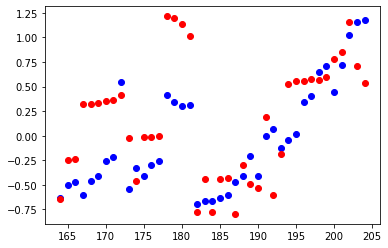

In [361]:
plt.scatter(y_test.index,y_test,color = 'blue')
plt.scatter(y_test.index,y_predict,color = 'red')
plt.show()

In [362]:
# Đánh giá tập dữ liệu x_train và y_train khi đưa vào mô hình
X_train = sm.add_constant(X_train)
model_train = sm.OLS(y_train,X_train)
results = model_train.fit()
results.params

const    0.041863
x1       0.137947
x2      -0.046949
x3       0.173421
x4       0.109167
x5      -0.060574
x6       0.392854
x7      -0.060448
x8       0.282880
x9       0.169538
x10     -0.148534
x11     -0.090405
x12      0.105666
x13      0.191236
x14      0.035389
x15     -0.050004
dtype: float64

In [363]:
X_train = merged_df1_ch_15.iloc[:164,:15].values.reshape(-1,15)
y_train = merged_df1_ch_15.iloc[:164,-1]
exog_train = sm.add_constant(X_train)
estimator_train = sm.OLS(y_train,exog_train).fit()
print(estimator_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     81.61
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.35e-63
Time:                        23:00:46   Log-Likelihood:                -63.578
No. Observations:                 164   AIC:                             159.2
Df Residuals:                     148   BIC:                             208.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0419      0.033      1.261      0.2

In [365]:
wheelbase = float(input('Nhập Chiều dài cơ sở wheelbase: '))
carlength = float(input('Nhập Chiều dài xe carlength: '))
carwidth = float(input('Nhập Chiều rộng xe carwidth: '))
curbweight = float(input('Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: '))
cylindernumber = float(input('Nhập Số lượng xi lanh đặt trong xe cylindernumber: '))
enginesize = float(input('Nhập Kích thước động cơ enginesize: '))
boreratio = float(input('Nhập Tỉ số hành trình boreratio: '))
horsepower = float(input('Nhập Mã lực horsepower: '))
citympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: '))
highwaympg = float(input('Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: '))

encoder_aspiration = float(input('Nhập loại hút (turbo hoặc std): '))

encoder_drivewheel = float(input('Nhập Loại bánh xe: '))

encoder_enginelocation = float(input('Nhập Vị trí động cơ: '))

encoder_fuelsystem = float(input('Nhập Hệ thống nhiên liệu của xe ô tô: '))

encoder_CarBrand = float(input('Nhập hãng xe: '))

price = model.predict([[wheelbase, carlength, carwidth, curbweight, cylindernumber, enginesize, 
                       boreratio, horsepower, citympg, highwaympg, encoder_drivewheel, encoder_fuelsystem]])
price

Nhập Chiều dài cơ sở wheelbase: 0.956109
Nhập Chiều dài xe carlength: 1.117295
Nhập Chiều rộng xe carwidth: 0.276731
Nhập Trọng lượng của xe khi không có người hoặc hành lý curbweight: 1.107864
Nhập Số lượng xi lanh đặt trong xe cylindernumber: 1.502032
Nhập Kích thước động cơ enginesize: 1.061426
Nhập Tỉ số hành trình boreratio: -0.221170
Nhập Mã lực horsepower: 1.315237
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố citympg: -0.799782
Nhập số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc highwaympg: -0.982764
Nhập loại hút (turbo hoặc std): -0.469295
Nhập Loại bánh xe: 1.213330
Nhập Vị trí động cơ: -0.121867
Nhập Hệ thống nhiên liệu của xe ô tô: 0.869568
Nhập hãng xe: 1.080850


array([1.307075])

In [364]:
# Hiển thị một bản ghi ở tập test ví dụ:
# Ví dụ bản ghi
row = merged_df1_ch_15.iloc[180]
row

wheelbase                 0.956109
carlength                 1.117295
carwidth                  0.276731
curbweight                1.107864
cylindernumber            1.502032
enginesize                1.061426
boreratio                -0.221170
horsepower                1.315237
citympg                  -0.799782
highwaympg               -0.982764
encoder_aspiration       -0.469295
encoder_drivewheel        1.213330
encoder_enginelocation   -0.121867
encoder_fuelsystem        0.869568
encoder_CarBrand          1.080850
price                     0.302822
Name: 180, dtype: float64

# KẾT LUẬN 

# ĐÁNH GIÁ CHẤT LƯỢNG MÔ HÌNH 

In [373]:
# Thông số R_square
print ('Thông số R_square Train model', model_train.score(X_train, y_train.ravel()))
print ('Thông số R_square Test model', model_test.score(X_test, y_test.ravel()))

# MSE (tổng bình phương sai số trung bình)
y_predict_train = model_train.predict(X_train)
mse_train = mean_squared_error(y_train, y_predict_train)
print ('Tổng bình phương sai số trung bình: ',mse_train)

y_predict_test = model_test.predict(X_test)
mse_test = mean_squared_error(y_test, y_predict)
print ('Tổng bình phương sai số trung bình: ',mse_test)



Thông số R_square Train model 0.8921374650530579
Thông số R_square Test model 0.9504057410940515
Tổng bình phương sai số trung bình:  0.12713146605572948
Tổng bình phương sai số trung bình:  0.20404863763231967


# KẾT LUẬN 

# Vậy các 15 thuộc tính này ảnh hưởng tới giá xe:
- "wheelbase", "carlength",'carwidth','curbweight','cylindernumber',
- 'enginesize', 'boreratio','horsepower','citympg','highwaympg',
- 'encoder_aspiration','encoder_drivewheel','encoder_enginelocation','encoder_fuelsystem','encoder_CarBrand'

# Phương trình tính giá price
The linear model is: 
 price = 0.041862966912335174 +0.13794700522641096 * wheelbase + -0.046948966765843723 * carlength + 0.1734205463310928 * carwidth + 0.1091669581217515 * curbweight + -0.060574167560998184 * cylindernumber + 0.39285439489355795 * enginesize + -0.06044838623009787 * boreratio + 0.28288038339821103 * horsepower + 0.1695380924894065 * citympg + -0.1485344160695734 * highwaympg + -0.0904050287944313 * encoder_aspiration + 0.10566614967332125 * encoder_drivewheel + 0.19123597059893022 * encoder_enginelocation + 0.03538853083853448 * encoder_fuelsystem + -0.05000374141596464 * encoder_CarBrand